In [1]:
# Final Variablen
API_KEY_SPOONACULAR = "146fe79a630b4afb8306a2985bedc64c"
API_KEY_REDDIT = "KAJ2xGzCOlH3hyTRADNdSBDuTBORvw"
API_CLIENTID_REDDIT = "tSemvcUBRFCTYQ"

USERNAME_REDDIT = "Short-Arrival7632"
PW_REDDIT = "cookies123"

In [19]:
# KONFIGURATION

LIMIT_REDDIT_POSTS = 100
LIMIT_SPOONACULAR_RECIPES = 5

In [ ]:
# Auf Windows ausführen (einmalig)
!pip install praw
!pip install pandas
!pip install matplotlib
!pip install mysql-connector-python

In [1]:
# Auf Linux ausführen (einmalig)
!pip3 install praw
!pip3 install pandas
!pip3 install matplotlib
!pip3 install mysql-connector-python

    100% |████████████████████████████████| 163kB 1.5MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/4c/5f/f61b420143ed1c8dc69f9eaec5ff1ac36109d52c80de49d66e0c36c3dfdf/websocket_client-0.57.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1d/40/b741437ce4c7b64f928513817b29c0a615efb66ab5e5e01f66fe92d2d95b/prawcore-1.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0c/ba/8dd7fa5f0b1c6a8ac62f8f57f7e794160c1f86f31c6d0fb00f582372a3e4/update_checker-0.18.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/c1/24814557f1d22c56d50280771a17307e6bf87b70727d975fd6b2ce6b014a/requests-2.25.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/23/fc/8a49991f7905261f9ca9df5aa9b58363c3c821ce3e7f671895442b7100f2/urllib3-1.26.3

In [3]:
import praw
import pandas as pd
from datetime import datetime
import requests
import json
import matplotlib.pyplot as plt
import mysql.connector

### Connect to Database

In [18]:
db_connection = mysql.connector.connect(
  host= "wp.jagi.wtf",
  user= "redditu",
  password= "redditMaster",
  database="reddit"
  )


In [19]:
cursor = db_connection.cursor()

In [20]:
cursor.execute("SELECT count(id) FROM reddit")
res = cursor.fetchall()

In [21]:
res

[(30000,)]

### Get subreddit data

In [20]:
reddit = praw.Reddit(client_id = API_CLIENTID_REDDIT,
                    client_secret = API_KEY_REDDIT,
                    username= USERNAME_REDDIT,
                    password = PW_REDDIT,
                    user_agent = "food_dashboard_v01")

sr = reddit.subreddit("food")

In [21]:
# retrieve new posts
new_posts = sr.hot(limit=LIMIT_REDDIT_POSTS)

In [22]:
# clean data 
new_posts_lst = []
for post in new_posts:
    timestamp_created = post.created
    time_created = datetime.fromtimestamp(timestamp_created).strftime("%H:%M:%S")
    day_created = datetime.fromtimestamp(timestamp_created).strftime("%Y-%m-%d")
    hour_created = datetime.fromtimestamp(timestamp_created).strftime("%H")
    
    # created time, created day, author, title, likes, downs, num_comments, text, thumbnail, url
    x = [hour_created, time_created, day_created, post.author, post.title, post.ups, post.downs, post.num_comments, post.selftext, post.thumbnail, post.url]
    new_posts_lst.append(x)

In [23]:
# create DataFrame
df = pd.DataFrame(data=new_posts_lst, columns=["hour_created", "created_time", "created_day", "author", "title", "likes", "downs", "num_comments", "text", "thumbnail", "url"])

In [25]:
df

,likes,downs,num_comments
count,100.000000,100.0,100.000000
mean,815.180000,0.0,27.040000
std,4448.353234,0.0,142.050704
min,6.000000,0.0,0.000000
25%,34.000000,0.0,2.000000
50%,63.000000,0.0,4.500000
75%,166.500000,0.0,10.000000
max,40744.000000,0.0,1375.000000


In [36]:
x = df["hour_created"].value_counts().to_dict()
sorted_hour = []
sorted_counts = []
for elem in sorted(x.items()):
    sorted_hour.append(elem[0])
    sorted_counts.append(elem[1])


<BarContainer object of 21 artists>

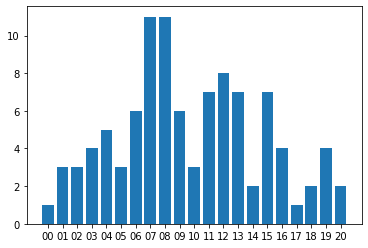

In [37]:
plt.bar(sorted_hour, sorted_counts)

In [12]:
df["cleaned_text"] = df["title"].apply(str.lower)

In [16]:
def delete_homemade(text):
    new_text = ""
    old_text = text.split()
    for word in old_text:
        if word[0] != "[":
            if len(new_text) == 0:
                new_text = word
            else:
                new_text = new_text + "," + word
    return new_text

In [17]:
df["cltext"] = df["cleaned_text"].apply(delete_homemade)

In [18]:
df.head()

,hour_created,created_time,created_day,author,title,likes,downs,num_comments,text,thumbnail,url,cleaned_text,cltext
0,08,08:48:37,2021-02-08,daynestxbbq,[PRO/CHEF] Texas Barbecue Platter,39510,0,1337,,https://b.thumbs.redditmedia.com/8dY2UPIltw6QD...,https://i.redd.it/zclugg5m75g61.jpg,[pro/chef] texas barbecue platter,"texas,barbecue,platter"
1,03,03:19:56,2021-02-08,jojofaye,[homemade] Whole lemon cake doughnuts with whi...,2447,0,37,,https://b.thumbs.redditmedia.com/voaO-2Yv62C7M...,https://i.redd.it/2dgjjzuxk3g61.jpg,[homemade] whole lemon cake doughnuts with whi...,"whole,lemon,cake,doughnuts,with,white,chocolat..."
2,18,18:49:38,2021-02-07,aka_scoch,[homemade] raspberry cream cake covered in Legos,18427,0,383,,https://b.thumbs.redditmedia.com/ql-XfyeTNstPp...,https://i.redd.it/dz168i5x11g61.jpg,[homemade] raspberry cream cake covered in legos,"raspberry,cream,cake,covered,in,legos"
3,07,07:18:47,2021-02-08,will20566,[Homemade] Calamari,796,0,23,,https://b.thumbs.redditmedia.com/s7gGC9-olz4cc...,https://i.redd.it/03mtxaalr4g61.jpg,[homemade] calamari,calamari
4,04,04:15:36,2021-02-08,Untoastedtoast390,[homemade] “yogurt eggs and apple fries”,1258,0,67,,https://b.thumbs.redditmedia.com/SMcQN2Uj1xpwA...,https://i.redd.it/37snzekwu3g61.jpg,[homemade] “yogurt eggs and apple fries”,"“yogurt,eggs,and,apple,fries”"


In [ ]:
def getRecipe(suchwort):
    req_url = "https://api.spoonacular.com/recipes/complexSearch?apiKey=" + API_KEY_SPOONACULAR + "&query=" + suchwort + "&number=" + str(LIMIT_SPOONACULAR_RECIPES) + "&addRecipeNutrition=TRUE"
    resp = requests.get(req_url)
    jresp = json.loads(resp.text)
    all_recipes = []
    for recipe in jresp["results"]:
        rlist = [recipe["vegetarian"], 
        recipe["vegan"],
        recipe["glutenFree"],
        recipe["dairyFree"],
        recipe["aggregateLikes"],
        recipe["readyInMinutes"],
        recipe["spoonacularSourceUrl"]]
        
        nutrients = recipe["nutrition"]["nutrients"]
        ingredients = recipe["nutrition"]["ingredients"]
        
        for nutrient in nutrients:
            # Calories, Sugar, Fat, Carbohydrates
            # name, amount, unit
            itemList = ["Calories", "Sugar", "Fat"]
            if nutrient["name"] in itemList:
                rlist.append(nutrient["amount"])
                
        ilist = []
        for ingredient in ingredients:
            # name
            ilist.append(ingredient["name"])
        rlist.append(ilist)

        all_recipes.append(rlist)
    return all_recipes    

In [ ]:
x = getRecipe("raspberry")

In [ ]:
x

### Get random recipes from spoonacular

In [ ]:
req_url = "https://api.spoonacular.com/recipes/random?apiKey=" + API_KEY_SPOONACULAR + "&number=" + str(LIMIT_SPOONACULAR_RECIPES) + "&addRecipeNutrition=TRUE"

In [ ]:
resp = requests.get(req_url)
jresp = json.loads(resp.text)

In [ ]:
for recipe in jresp["recipes"]:
    print(recipe)
    break
    print(recipe["aggregateLikes"])
    print(recipe["spoonacularSourceUrl"])

In [38]:
datetime.now()

datetime.datetime(2021, 2, 8, 13, 24, 20, 289327)